## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import Image
from matplotlib.gridspec import GridSpec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

## Extração Dataset

In [2]:
filepath = '../data/raw/ecommerce-dataset.xlsx'
df = pd.read_excel(filepath, sheet_name="E Comm")

In [3]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## Divisão Treino e Teste

In [4]:
x = df.loc[:, ~df.columns.isin(['Churn', 'CustomerID'])]
y = df[['Churn']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

### Merge

In [5]:
train = x_train.merge(y_train, left_index=True, right_index=True)
test = x_test.merge(y_test, left_index=True, right_index=True)

## Análise Exploratória (EDA) E Preparação dos Dados


In [6]:
x_train.shape # VISUALIZAR QUANTAS LINHAS E COLUNAS

(3941, 18)

In [7]:
y_train.shape # VISUALIZAR QUANTAS LINHAS E COLUNAS

(3941, 1)

In [8]:
# VERIFICAR TIPO DOS DADOS
pd.DataFrame({'train': x_train.dtypes, 'test': x_test.dtypes})

,train,test
Tenure,float64,float64
PreferredLoginDevice,object,object
CityTier,int64,int64
WarehouseToHome,float64,float64
PreferredPaymentMode,object,object
Gender,object,object
HourSpendOnApp,float64,float64
NumberOfDeviceRegistered,int64,int64
PreferedOrderCat,object,object
SatisfactionScore,int64,int64


In [9]:
# calcula a proporção de dados nulos em relação a quantidade total dos dados
pd.DataFrame ({'train': round(100*(x_train.isnull().sum()/x_train.count()), 2),
              'test': round(100*(x_test.isnull().sum()/x_test.count()), 2)})

,train,test
Tenure,5.01,4.71
PreferredLoginDevice,0.00,0.00
CityTier,0.00,0.00
WarehouseToHome,4.73,4.52
PreferredPaymentMode,0.00,0.00
Gender,0.00,0.00
HourSpendOnApp,4.95,4.26
NumberOfDeviceRegistered,0.00,0.00
PreferedOrderCat,0.00,0.00
SatisfactionScore,0.00,0.00


## Análise Individual das Features

### Churn

In [10]:
y_train.isnull().sum(), y_test.isnull().sum()

(Churn    0
 dtype: int64,
 Churn    0
 dtype: int64)

In [11]:
y_train.value_counts()

Churn
0        3286
1         655
Name: count, dtype: int64

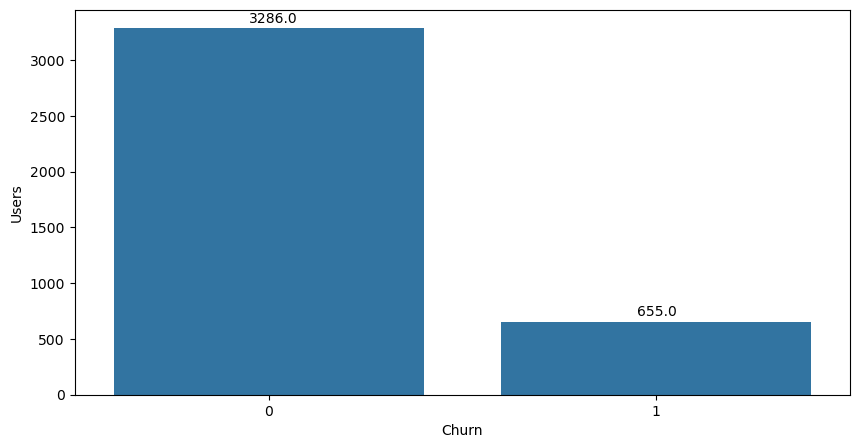

In [12]:
plt.figure(figsize=(10,5))
ax = sns.countplot(data=y_train, x='Churn')
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+50))
plt.ylabel('Users')
plt.show()

In [13]:
## Substituir nulos pela mediana

x_train['Tenure'] = x_train['Tenure'].fillna(x_train['Tenure'].median())
x_test['Tenure'] = x_test['Tenure'].fillna(x_test['Tenure'].median())

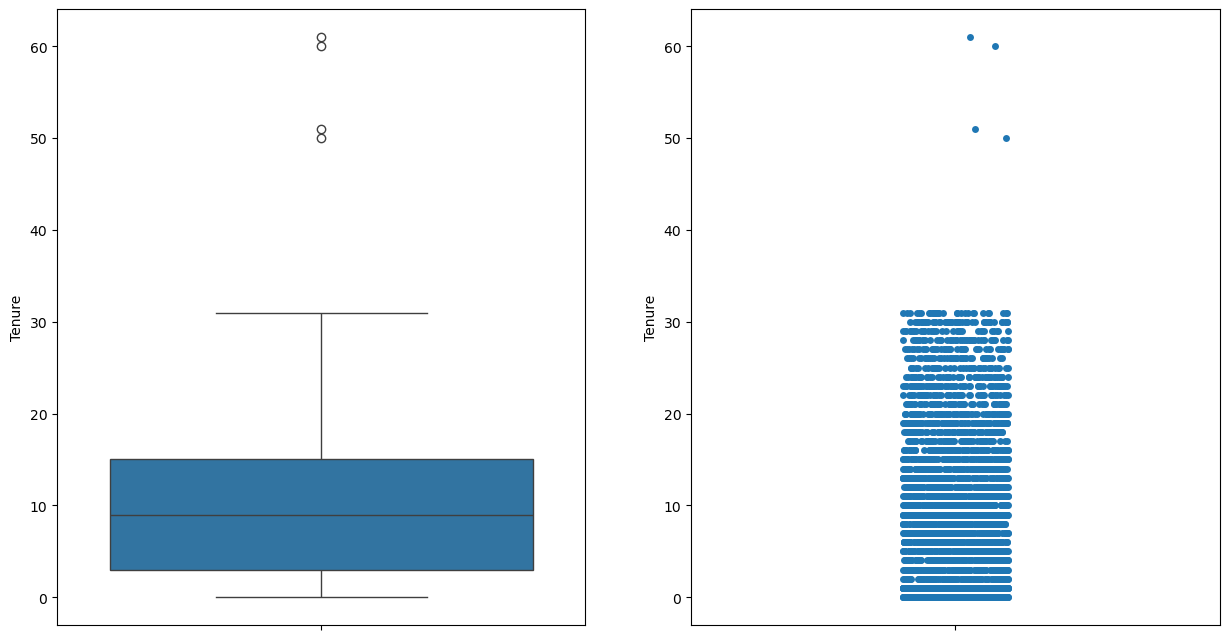

In [14]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,1]))
plt.show()

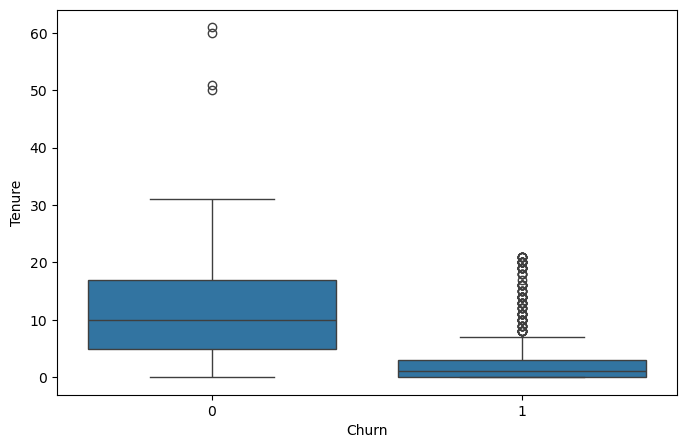

In [15]:
## verificar a correlação entre churn e tenure.

plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['Tenure'])
plt.show()

## pode-se observar que os usuários que não deram churn costumam ter mais tempo de casa. 
## Enquanto quem deu churn tem até 10 meses de casa

### Tenure
O tempo que o usuário está na organização (em meses)

Informações: 
Variável numérica discreta

In [16]:
x_train['Tenure'].isnull().sum(), x_test['Tenure'].isnull().sum()

(0, 0)

In [17]:
x_train['Tenure'].head()

4220     6.0
4113     1.0
5122    25.0
916      1.0
1185    30.0
Name: Tenure, dtype: float64

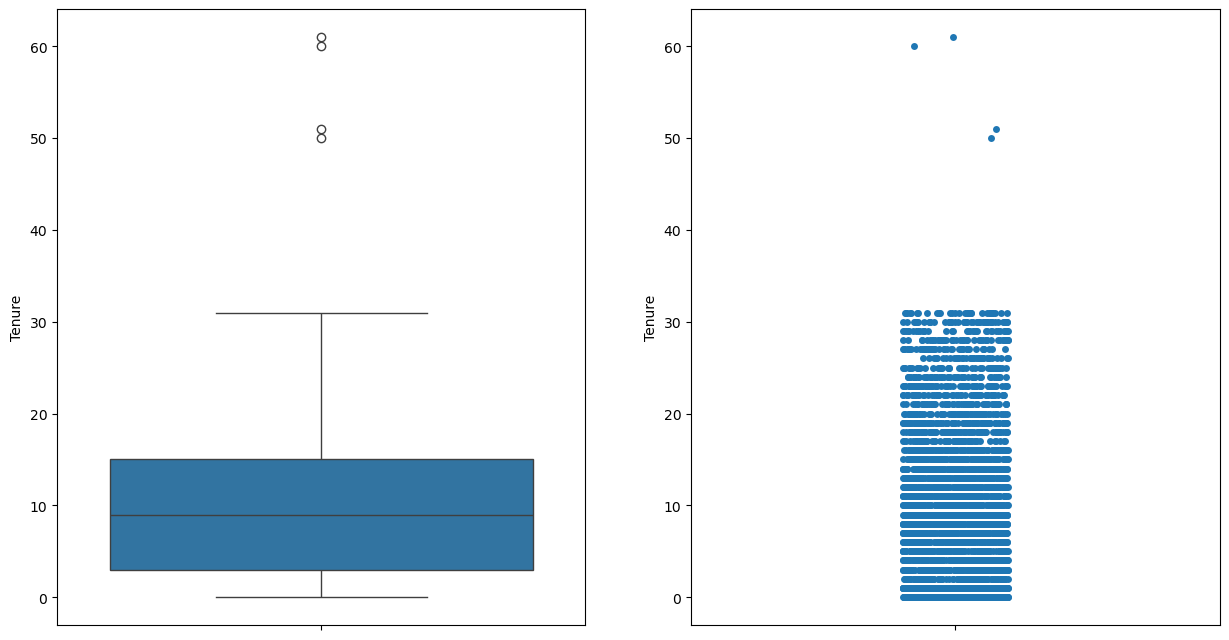

In [18]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [19]:
x_train['Tenure'].sort_values(ascending=False)
## Nesse caso, há dois valores categorizados como outliers: 60 e 50

5534    61.0
2719    60.0
3743    51.0
928     50.0
2853    31.0
        ... 
1843     0.0
350      0.0
290      0.0
1123     0.0
2546     0.0
Name: Tenure, Length: 3941, dtype: float64

In [20]:
x_test['Tenure'].sort_values(ascending=False)
## Nesse caso, há dois valores categorizados como outliers: 61 e 51

3050    31.0
3114    31.0
3587    31.0
4385    31.0
3433    31.0
        ... 
2034     0.0
1188     0.0
20       0.0
1766     0.0
2684     0.0
Name: Tenure, Length: 1689, dtype: float64

In [21]:
# A abordagem será atribuir a esses outliers o valor máximo encontrado: 31

x_train['Tenure'] = np.where(x_train['Tenure'] > 31, 31, x_train['Tenure'])
x_test['Tenure'] = np.where(x_test['Tenure'] > 31, 31, x_test['Tenure'])

In [22]:
## Dados nulos

# Tratar dados nulos substituindo pela mediana
x_train['Tenure'].median()

9.0

In [23]:
x_train[x_train['Tenure'].isnull()==True]

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [24]:
x_test[x_test['Tenure'].isnull()==True]

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


In [25]:
## Substituir nulos pela mediana

x_train['Tenure'] = x_train['Tenure'].fillna(x_train['Tenure'].median())
x_test['Tenure'] = x_test['Tenure'].fillna(x_test['Tenure'].median())

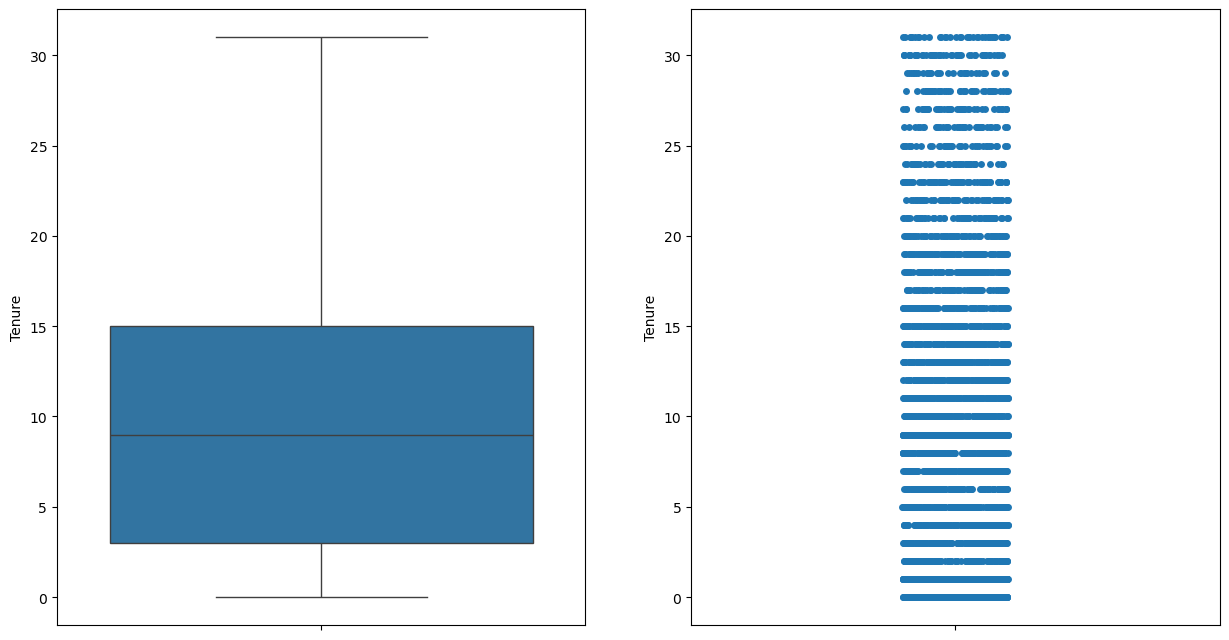

In [26]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['Tenure'], ax=fig.add_subplot(gs[0,1]))
plt.show()

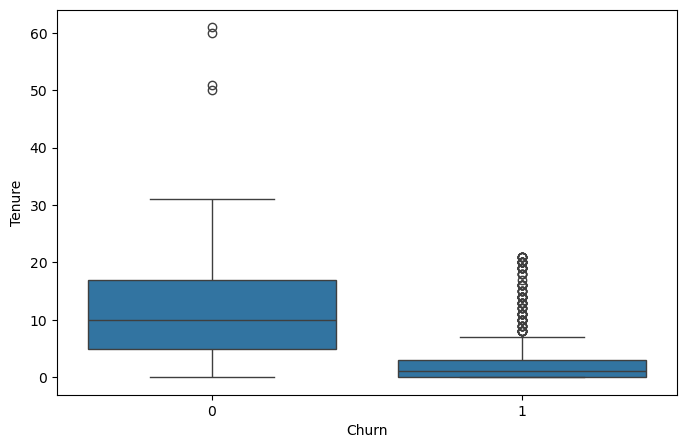

In [27]:
## verificar a correlação entre churn e tenure.

plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['Tenure'])
plt.show()

## pode-se observar que os usuários que não deram churn costumam ter mais tempo de casa. 
## Enquanto quem deu churn tem até 10 meses de casa

In [28]:
#correlação de pirsen
#-1 a 1 
# 0: não há correlação entre as variáveis

# 1: correlação positiva perfeita (quando uma cresce, a outra cresce tb)
# -1: correlação negativa (quando uma cresce, a outra decresce)


train[['Tenure', 'Churn']].corr()
## Baseado no resultado, quanto mais tempo de casa, menos provável de ser um possível churn

,Tenure,Churn
Tenure,1.000000,-0.345859
Churn,-0.345859,1.000000


### PreferredLoginDevice

Variável categórica nominal

In [29]:
x_train['PreferredLoginDevice'].isnull().sum(), x_test['PreferredLoginDevice'].isnull().sum()

(0, 0)

In [30]:
x_train['PreferredLoginDevice'].value_counts()

PreferredLoginDevice
Mobile Phone    1930
Computer        1153
Phone            858
Name: count, dtype: int64

In [31]:
x_train['PreferredLoginDevicemobilePhone'] = np.where(x_train['PreferredLoginDevice'] == "Mobile Phone", 1, 0)
x_train['PreferredLoginDevice_computer'] = np.where(x_train['PreferredLoginDevice'] == "Computer", 1, 0)
x_train['PreferredLoginDevice_Phone'] = np.where(x_train['PreferredLoginDevice'] == "Phone", 1, 0)
x_train.drop(columns = ['PreferredLoginDevice'], inplace=True)

In [32]:
x_test['PreferredLoginDevice_mobilePhone'] = np.where(x_test['PreferredLoginDevice'] == "Mobile Phone", 1, 0)
x_test['PreferredLoginDevice_computer'] = np.where(x_test['PreferredLoginDevice'] == "Computer", 1, 0)
x_test['PreferredLoginDevice_Phone'] = np.where(x_test['PreferredLoginDevice'] == "Phone", 1, 0)
x_test.drop(columns = ['PreferredLoginDevice'], inplace=True)

### CityTier

Qual a faixa de desenvolvimento em que a cidade se encontra

Variável numérica ordinal

In [33]:
x_train['CityTier'].isnull().sum(), x_test['CityTier'].isnull().sum()

(0, 0)

In [34]:
x_train['CityTier'].value_counts()

CityTier
1    2568
3    1186
2     187
Name: count, dtype: int64

### WarehouseToHome
Distância entre o armazém e a cada do cliente

In [35]:
x_train['WarehouseToHome'].isnull().sum(), x_test['WarehouseToHome'].isnull().sum()

(178, 73)

In [36]:
## Substituição dos dados nulos pela mediana
x_train['WarehouseToHome'].median()

13.0

In [37]:
x_train['WarehouseToHome'] = x_train['WarehouseToHome'].fillna(x_train['WarehouseToHome'].median())
x_test['WarehouseToHome'] = x_test['WarehouseToHome'].fillna(x_test['WarehouseToHome'].median())

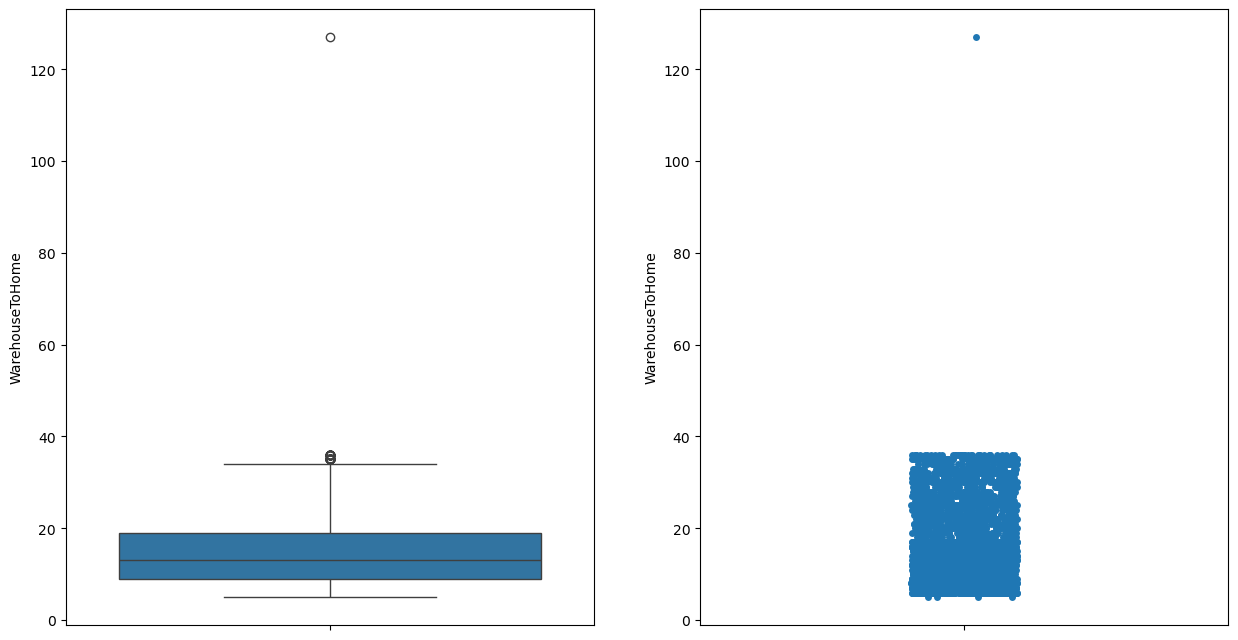

In [38]:
## Análise dos outliers

fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['WarehouseToHome'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['WarehouseToHome'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [39]:
x_train['WarehouseToHome'].sort_values(ascending=False)

4124    127.0
2961     36.0
2889     36.0
3964     36.0
4431     36.0
        ...  
1290      6.0
451       5.0
1401      5.0
2151      5.0
1001      5.0
Name: WarehouseToHome, Length: 3941, dtype: float64

In [40]:
x_test['WarehouseToHome'].sort_values(ascending=False)

1309    126.0
2949     36.0
5233     36.0
4764     36.0
4359     36.0
        ...  
1413      6.0
2201      5.0
201       5.0
3490      5.0
1776      5.0
Name: WarehouseToHome, Length: 1689, dtype: float64

In [41]:
# substituir outliers pelo numero que parece ser o correto 

x_train['WarehouseToHome'] = x_train['WarehouseToHome'].replace(127, 17).replace(126, 16)

In [42]:
x_test['WarehouseToHome'].sort_values(ascending=False)

1309    126.0
2949     36.0
5233     36.0
4764     36.0
4359     36.0
        ...  
1413      6.0
2201      5.0
201       5.0
3490      5.0
1776      5.0
Name: WarehouseToHome, Length: 1689, dtype: float64

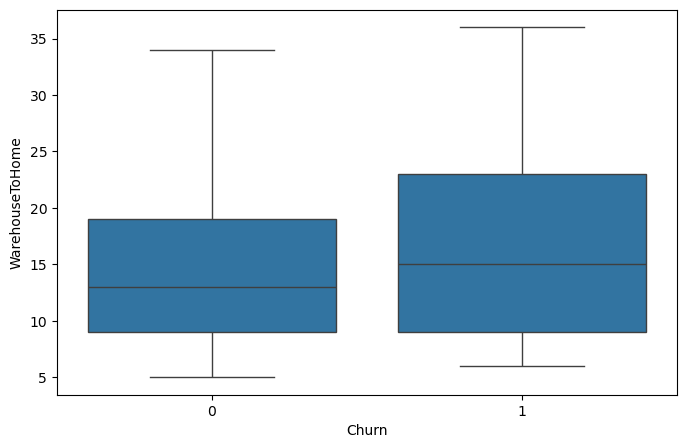

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['WarehouseToHome'], showfliers=False)
plt.show()

In [44]:
train[['Churn', 'WarehouseToHome']].corr()

,Churn,WarehouseToHome
Churn,1.00000,0.06754
WarehouseToHome,0.06754,1.00000


### PreferredPaymentMethod

método de pagamento preferido do cliente

Variável categórica nominal

In [45]:
x_train['PreferredPaymentMode'].isnull().sum(), x_test['PreferredPaymentMode'].isnull().sum()

(0, 0)

In [46]:
x_train['PreferredPaymentMode'].value_counts()

PreferredPaymentMode
Debit Card          1615
Credit Card         1034
E wallet             423
UPI                  301
COD                  260
CC                   201
Cash on Delivery     107
Name: count, dtype: int64

In [47]:
x_train['PreferredPaymentMode_Debit'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "Debit Card" else 0)
x_train['PreferredPaymentMode_Credit'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "Credit Card" else 0)
x_train['PreferredPaymentMode_Ewallet'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "E wallet" else 0)
x_train['PreferredPaymentMode_UPI'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "UPI" else 0)
x_train['PreferredPaymentMode_COD'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "COD" else 0)
x_train['PreferredPaymentMode_CC'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "CC" else 0)
x_train['PreferredPaymentMode_Cash'] = x_train['PreferredPaymentMode'].apply(lambda x: 1 if x == "Cash on Delivery" else 0)
x_train.drop(columns = ['PreferredPaymentMode'], inplace=True)

In [48]:
x_test['PreferredPaymentMode_Debit'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "Debit Card" else 0)
x_test['PreferredPaymentMode_Credit'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "Credit Card" else 0)
x_test['PreferredPaymentMode_Ewallet'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "E wallet" else 0)
x_test['PreferredPaymentMode_UPI'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "UPI" else 0)
x_test['PreferredPaymentMode_COD'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "COD" else 0)
x_test['PreferredPaymentMode_CC'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "CC" else 0)
x_test['PreferredPaymentMode_Cash'] = x_test['PreferredPaymentMode'].apply(lambda x: 1 if x == "Cash on Delivery" else 0)
x_test.drop(columns = ['PreferredPaymentMode'], inplace=True)

### Gender

variável categórica nominal

In [49]:
x_train['Gender'].isnull().sum(), x_test['Gender'].isnull().sum()

(0, 0)

In [50]:
x_train['Gender'].value_counts()

Gender
Male      2382
Female    1559
Name: count, dtype: int64

In [51]:
x_train['Gender'] = x_train['Gender'].apply(lambda x: 1 if x == "Male" else 0)
x_test['Gender'] = x_test['Gender'].apply(lambda x: 1 if x == "Male" else 0)

### HourSpendOnApp

Número de horas gastas na aplicação

In [52]:
x_train['HourSpendOnApp'].isnull().sum(), x_test['HourSpendOnApp'].isnull().sum()

(186, 69)

In [53]:
## substituir nulos por 0

x_train['HourSpendOnApp'] = x_train['HourSpendOnApp'].fillna(0)
x_test['HourSpendOnApp'] = x_test['HourSpendOnApp'].fillna(0)

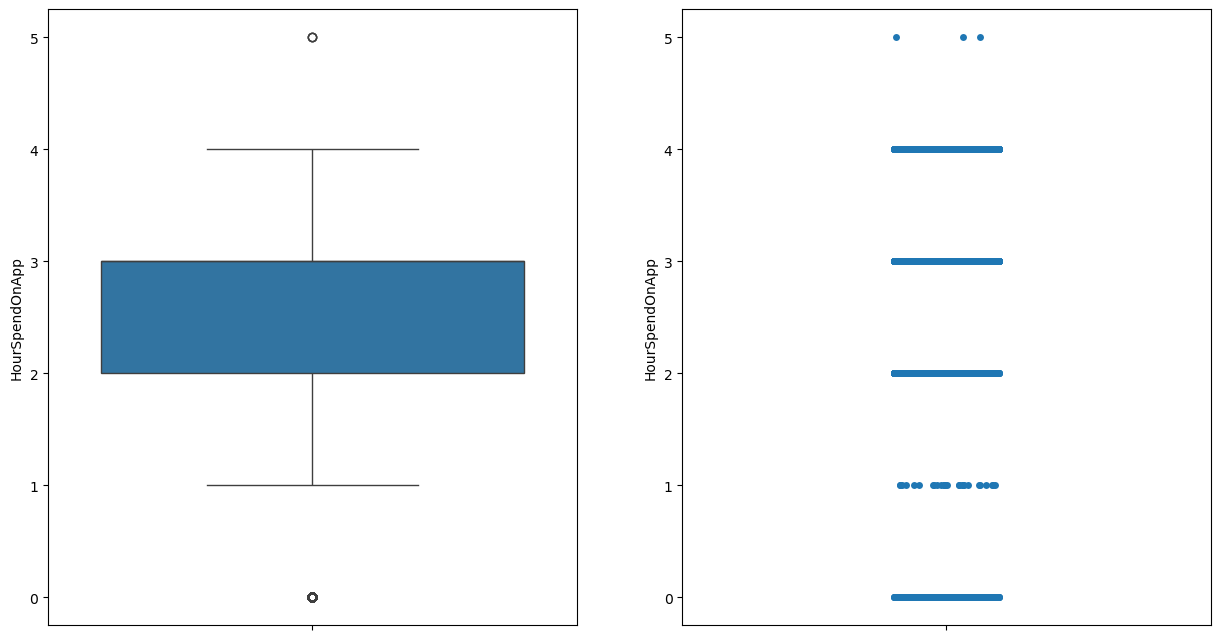

In [54]:
# Validar outliers

fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['HourSpendOnApp'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['HourSpendOnApp'], ax=fig.add_subplot(gs[0,1]))
plt.show()

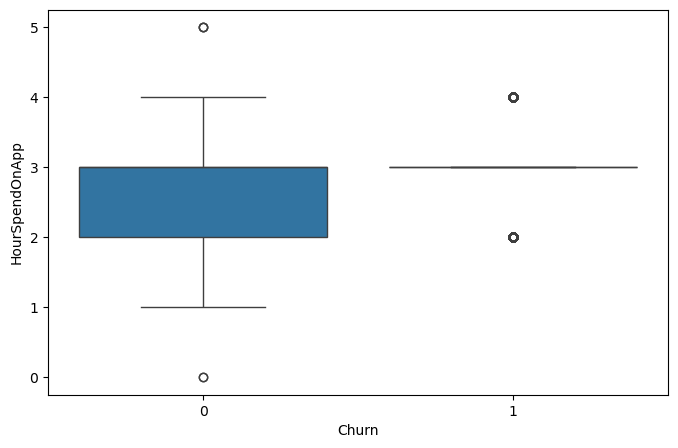

In [55]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['HourSpendOnApp'])
plt.show()

### NumberOfDeviceRegistered

Variável numérica discreta

In [56]:
x_train['NumberOfDeviceRegistered'].isnull().sum(), x_test['NumberOfDeviceRegistered'].isnull().sum()

(0, 0)

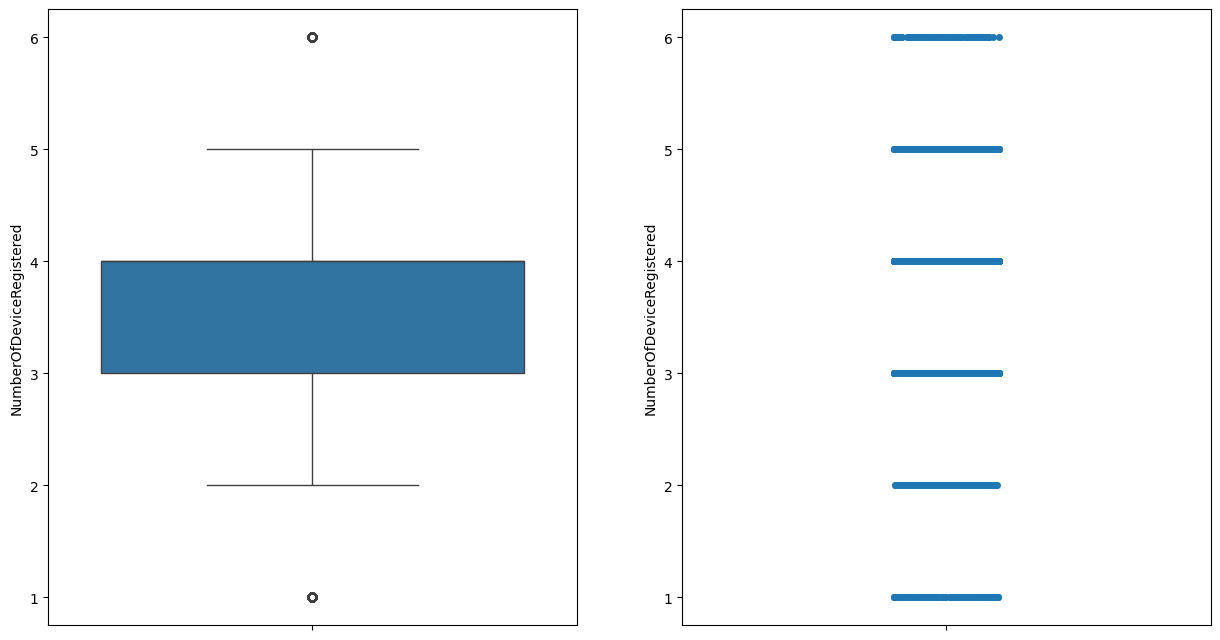

In [57]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['NumberOfDeviceRegistered'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['NumberOfDeviceRegistered'], ax=fig.add_subplot(gs[0,1]))
plt.show()

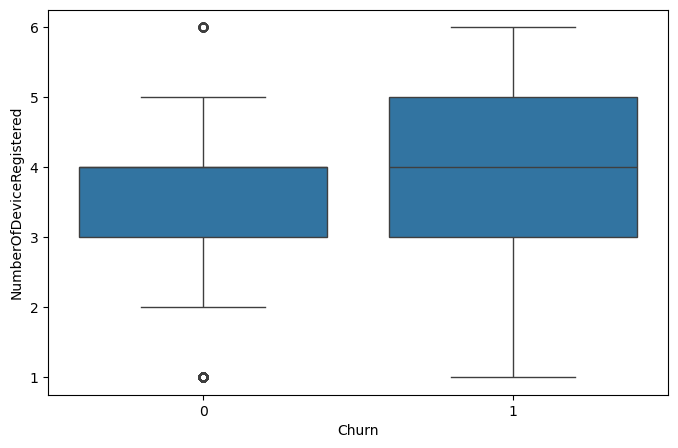

In [58]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['NumberOfDeviceRegistered'])
plt.show()

### PreferedOrderCat

Categoria preferida de pedido no ultimo mes

Variavel categórica nominal

In [59]:
x_train['PreferedOrderCat'].isnull().sum(), x_test['PreferedOrderCat'].isnull().sum()

(0, 0)

In [60]:
x_train['PreferedOrderCat'].value_counts()

PreferedOrderCat
Laptop & Accessory    1467
Mobile Phone           894
Mobile                 574
Fashion                552
Grocery                278
Others                 176
Name: count, dtype: int64

In [61]:
x_train['PreferedOrderCat_LaptopAndAcessory'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Laptop & Accessory" else 0)
x_train['PreferedOrderCat_MobilePhone'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile Phone" else 0)
x_train['PreferedOrderCat_Fashion'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Fashion" else 0)
x_train['PreferedOrderCat_Mobile'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile" else 0)
x_train['PreferedOrderCat_Grocery'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Grocery" else 0)
x_train['PreferedOrderCat_Others'] = x_train['PreferedOrderCat'].apply(lambda x: 1 if x == "Others" else 0)
x_train.drop(columns = ['PreferedOrderCat'], inplace=True)

In [62]:
x_test['PreferedOrderCat_LaptopAndAcessory'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Laptop & Accessory" else 0)
x_test['PreferedOrderCat_MobilePhone'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile Phone" else 0)
x_test['PreferedOrderCat_Fashion'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Fashion" else 0)
x_test['PreferedOrderCat_Mobile'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Mobile" else 0)
x_test['PreferedOrderCat_Grocery'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Grocery" else 0)
x_test['PreferedOrderCat_Others'] = x_test['PreferedOrderCat'].apply(lambda x: 1 if x == "Others" else 0)
x_test.drop(columns = ['PreferedOrderCat'], inplace=True)

### SatisfactionScore

Satisfação do cliente

Variável numérica discreta

In [63]:
x_train['SatisfactionScore'].isnull().sum(), x_test['SatisfactionScore'].isnull().sum()

(0, 0)

In [64]:
x_train['SatisfactionScore'].value_counts()

SatisfactionScore
3    1173
1     837
4     758
5     754
2     419
Name: count, dtype: int64

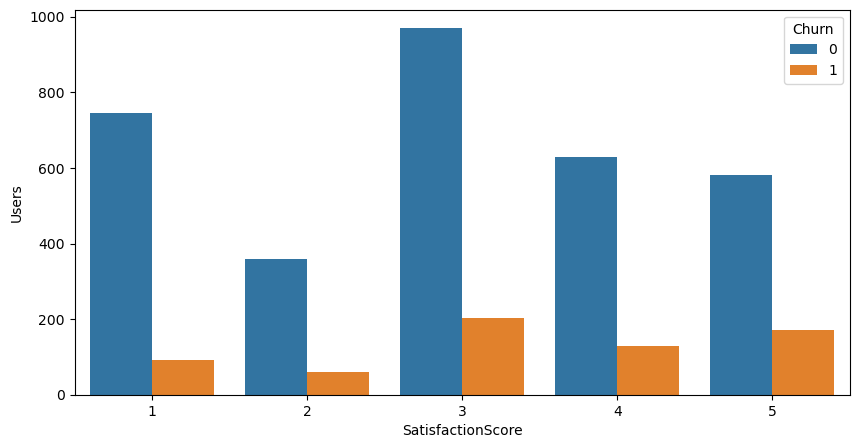

In [65]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['SatisfactionScore'], hue=train['Churn'])
plt.ylabel('Users')
plt.show()

### MaritalStatus

In [66]:
x_train['MaritalStatus'].isnull().sum(), x_test['MaritalStatus'].isnull().sum()

(0, 0)

In [67]:
x_train['MaritalStatus'].value_counts()

MaritalStatus
Married     2096
Single      1266
Divorced     579
Name: count, dtype: int64

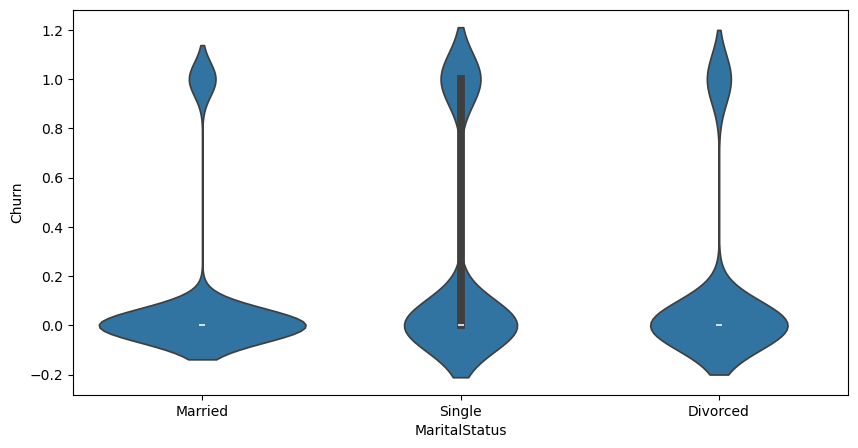

In [68]:
plt.figure(figsize=(10,5))
sns.violinplot(x=train['MaritalStatus'], y=train['Churn'])
plt.show()

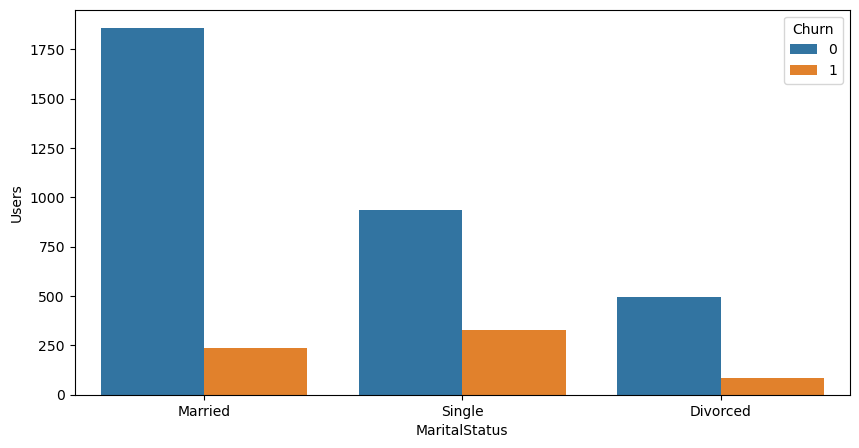

In [69]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['MaritalStatus'], hue=train['Churn'])
plt.ylabel('Users')
plt.show()

In [70]:
x_train['MaritalStatus_Single'] = x_train['MaritalStatus'].apply(lambda x: 1 if x == "Single" else 0)
x_train['MaritalStatus_Divorced'] = x_train['MaritalStatus'].apply(lambda x: 1 if x == "Divorced" else 0)
x_train['MaritalStatus_Married'] = x_train['MaritalStatus'].apply(lambda x: 1 if x == "Married" else 0)
x_train.drop(columns = ['MaritalStatus'], inplace=True)

In [71]:
x_test['MaritalStatus_Single'] = x_test['MaritalStatus'].apply(lambda x: 1 if x == "Single" else 0)
x_test['MaritalStatus_Divorced'] = x_test['MaritalStatus'].apply(lambda x: 1 if x == "Divorced" else 0)
x_test['MaritalStatus_Married'] = x_test['MaritalStatus'].apply(lambda x: 1 if x == "Married" else 0)
x_test.drop(columns = ['MaritalStatus'], inplace=True)

### NumberOfAddress

total de endereços cadastrados pelos usuários

Variável numérica discreta

In [72]:
x_train['NumberOfAddress'].isnull().sum(), x_test['NumberOfAddress'].isnull().sum()

(0, 0)

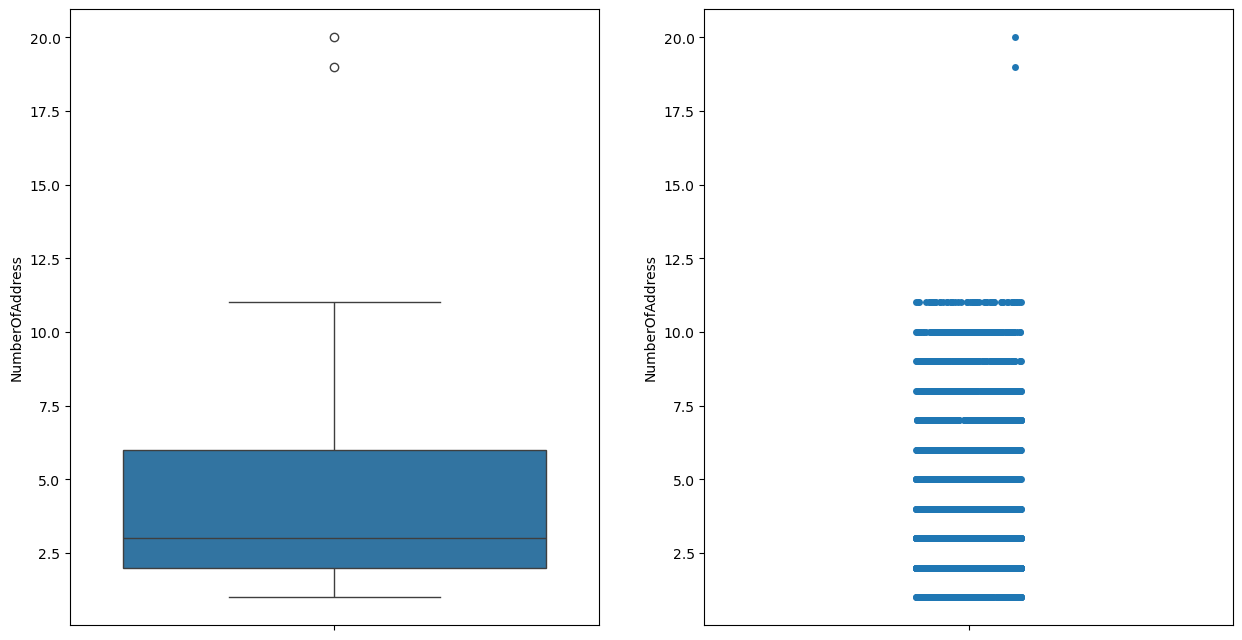

In [73]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['NumberOfAddress'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['NumberOfAddress'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [74]:
x_train.NumberOfAddress.sort_values(ascending=False).head(5)

3075    20
260     19
5422    11
3083    11
5305    11
Name: NumberOfAddress, dtype: int64

In [75]:
x_test.NumberOfAddress.sort_values(ascending=False).head(5)

3506    22
691     21
5195    11
3446    11
4616    11
Name: NumberOfAddress, dtype: int64

In [76]:
#substituição de outliers pelo máximo observado (11)
x_train.NumberOfAddress = np.where(x_train.NumberOfAddress > 15, 11, x_train.NumberOfAddress)
x_test.NumberOfAddress = np.where(x_test.NumberOfAddress > 15, 11, x_test.NumberOfAddress)

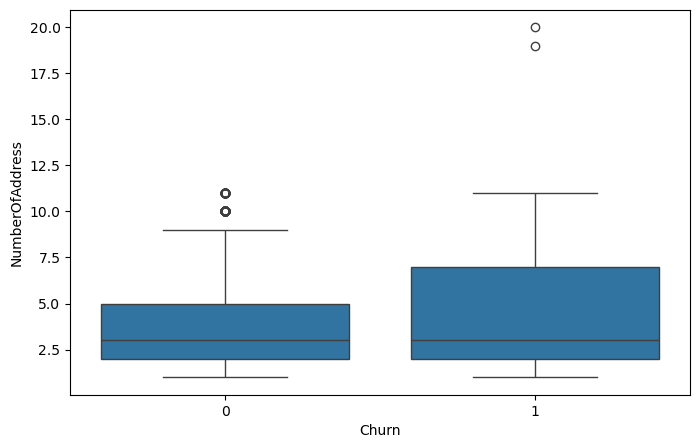

In [77]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['NumberOfAddress'])
plt.show()

In [78]:
train[['NumberOfAddress', 'Churn']].corr()

,NumberOfAddress,Churn
NumberOfAddress,1.000000,0.058204
Churn,0.058204,1.000000


### Complain

se o usuário abriu uma reclamação no último mês

Variável numérica nominal

In [79]:
x_train['Complain'].isnull().sum(), x_test['Complain'].isnull().sum()

(0, 0)

In [80]:
x_train['Complain'].value_counts()

Complain
0    2815
1    1126
Name: count, dtype: int64

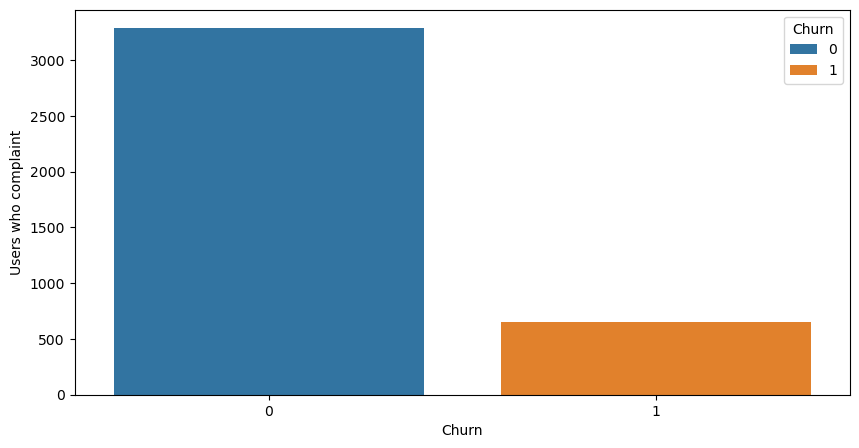

In [81]:
plt.figure(figsize=(10,5))
sns.countplot(x=train['Churn'], hue=train['Churn'])
plt.ylabel('Users who complaint')
plt.show()

### OrderAmountHikeFromlastYear

porcentagem de crescimento de pedidos do ano passado para esse ano

In [82]:
x_train['OrderAmountHikeFromlastYear'].isnull().sum(), x_test['OrderAmountHikeFromlastYear'].isnull().sum()

(173, 92)

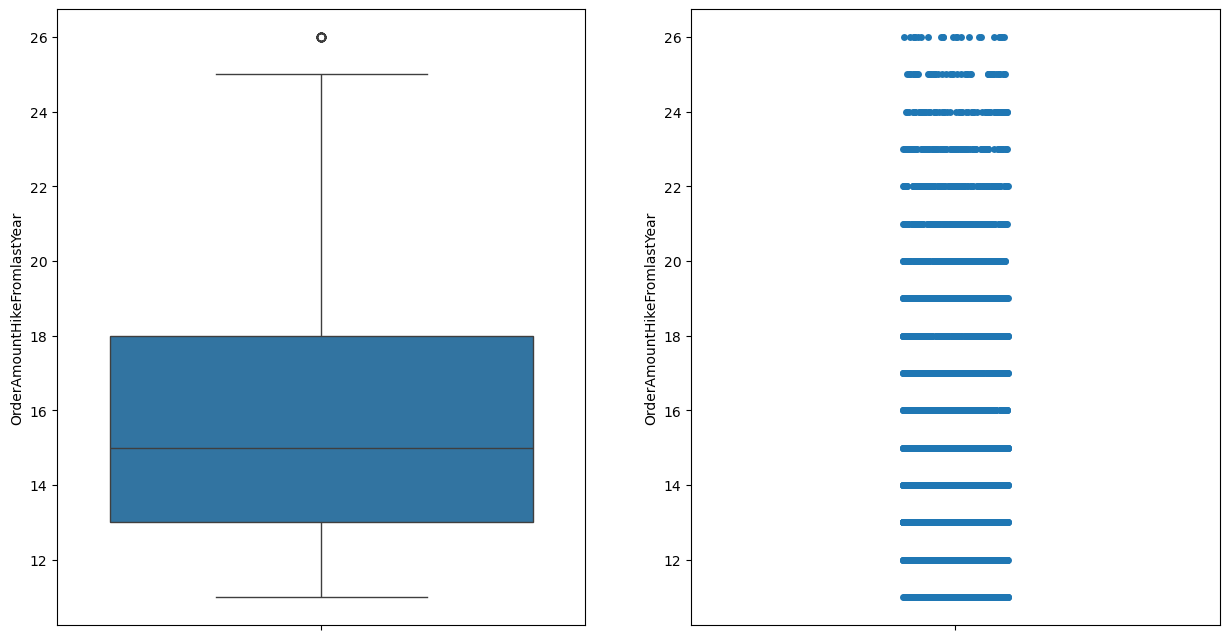

In [83]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['OrderAmountHikeFromlastYear'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['OrderAmountHikeFromlastYear'], ax=fig.add_subplot(gs[0,1]))
plt.show()

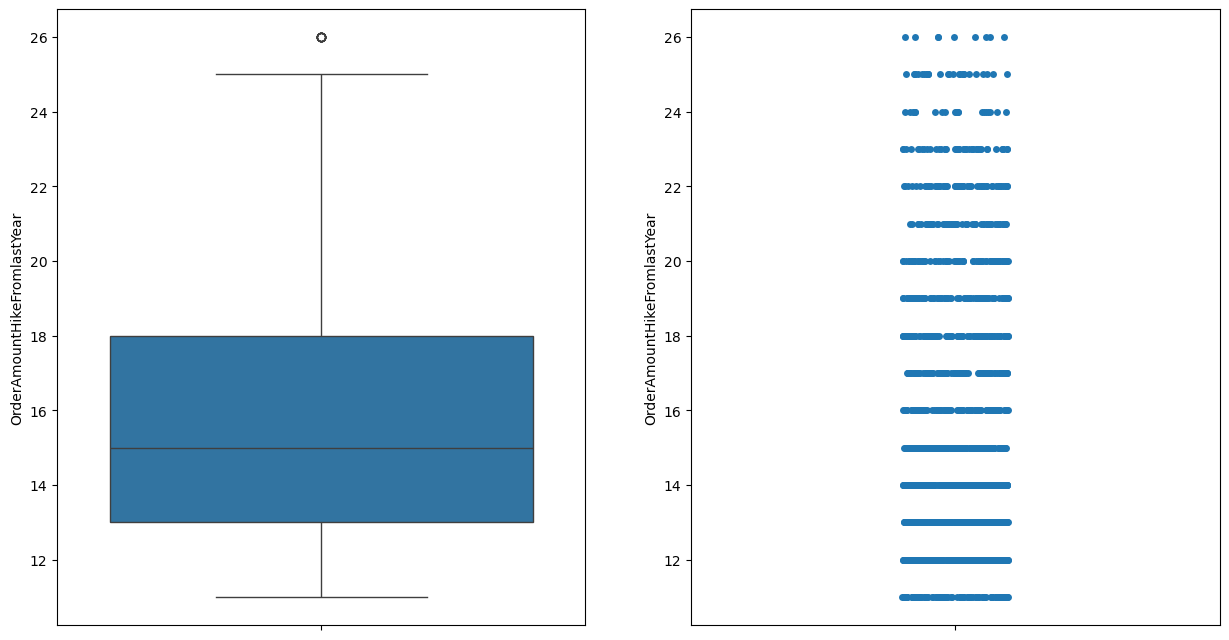

In [84]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_test['OrderAmountHikeFromlastYear'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_test['OrderAmountHikeFromlastYear'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [85]:
## Tratamento dos dados nulos 

# Entendendo valor mínimo e máximo do dataset
x_train['OrderAmountHikeFromlastYear'].min(), x_train['OrderAmountHikeFromlastYear'].max()

## Considerar como 0 (considerar que não teve pedido do ano passado para este ano)
x_train['OrderAmountHikeFromlastYear'] = x_train['OrderAmountHikeFromlastYear'].fillna(0)
x_test['OrderAmountHikeFromlastYear'] = x_test['OrderAmountHikeFromlastYear'].fillna(0)

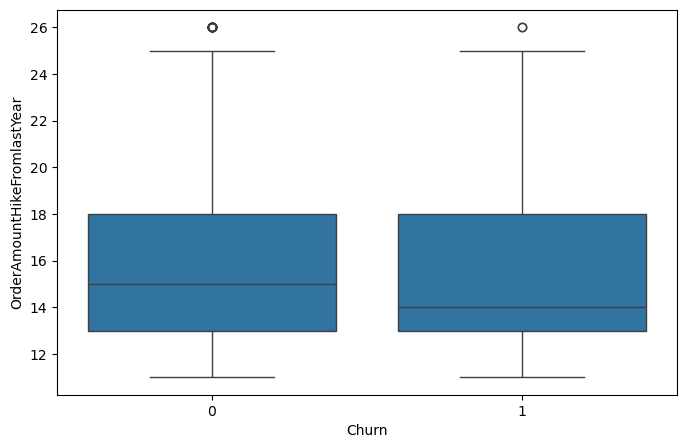

In [86]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['OrderAmountHikeFromlastYear'])
plt.show()

### CouponUsed

Variável numérica discreta

In [87]:
x_train['CouponUsed'].isnull().sum(), x_test['CouponUsed'].isnull().sum()

(184, 72)

In [88]:
# substituir nulos por 0 (supondo que não usou cupom)

x_train['CouponUsed'] = x_train['CouponUsed'].fillna(0)
x_test['CouponUsed'] = x_test['CouponUsed'].fillna(0)

In [89]:
x_train['CouponUsed'].value_counts()

CouponUsed
1.0     1463
0.0      925
2.0      899
3.0      221
4.0      136
5.0       89
6.0       70
7.0       65
8.0       28
9.0       11
10.0       9
12.0       8
11.0       7
13.0       4
14.0       3
16.0       2
15.0       1
Name: count, dtype: int64

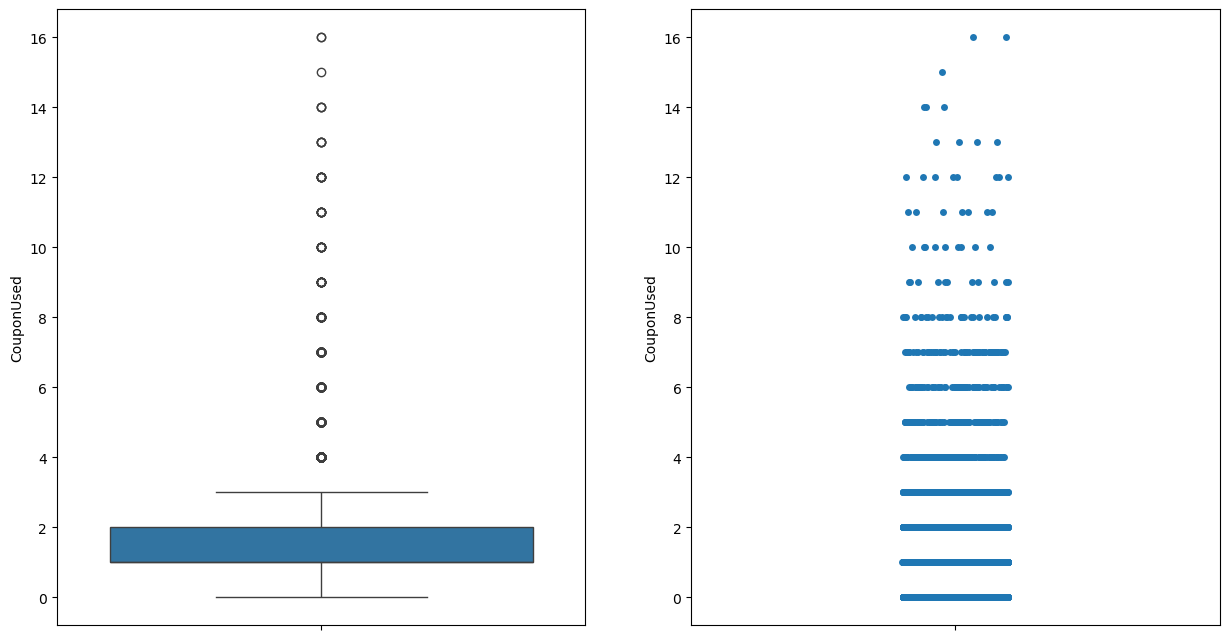

In [90]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['CouponUsed'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['CouponUsed'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [91]:
x_train[x_train['CouponUsed'] > x_train['OrderCount']]

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Cash,PreferedOrderCat_LaptopAndAcessory,PreferedOrderCat_MobilePhone,PreferedOrderCat_Fashion,PreferedOrderCat_Mobile,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married


### OrderCount

In [92]:
x_train['OrderCount'].isnull().sum(), x_test['OrderCount'].isnull().sum()

(164, 94)

In [93]:
## verificar se existe usuários com numero de compras nulo e que usaram cupom (o que não faz sentido já que você só poderia ter utilizado cupom se tiver feito pedido)
x_train[x_train.OrderCount.isnull()==True]['CouponUsed']

1185    1.0
5435    3.0
4436    6.0
2540    1.0
3765    1.0
       ... 
3314    1.0
5383    7.0
576     2.0
2232    0.0
3511    2.0
Name: CouponUsed, Length: 164, dtype: float64

In [94]:
x_train['OrderCount'] = np.where(x_train.OrderCount.isnull()==True, x_train.CouponUsed, x_train.OrderCount)
x_test['OrderCount'] = np.where(x_test.OrderCount.isnull()==True, x_test.CouponUsed, x_test.OrderCount)

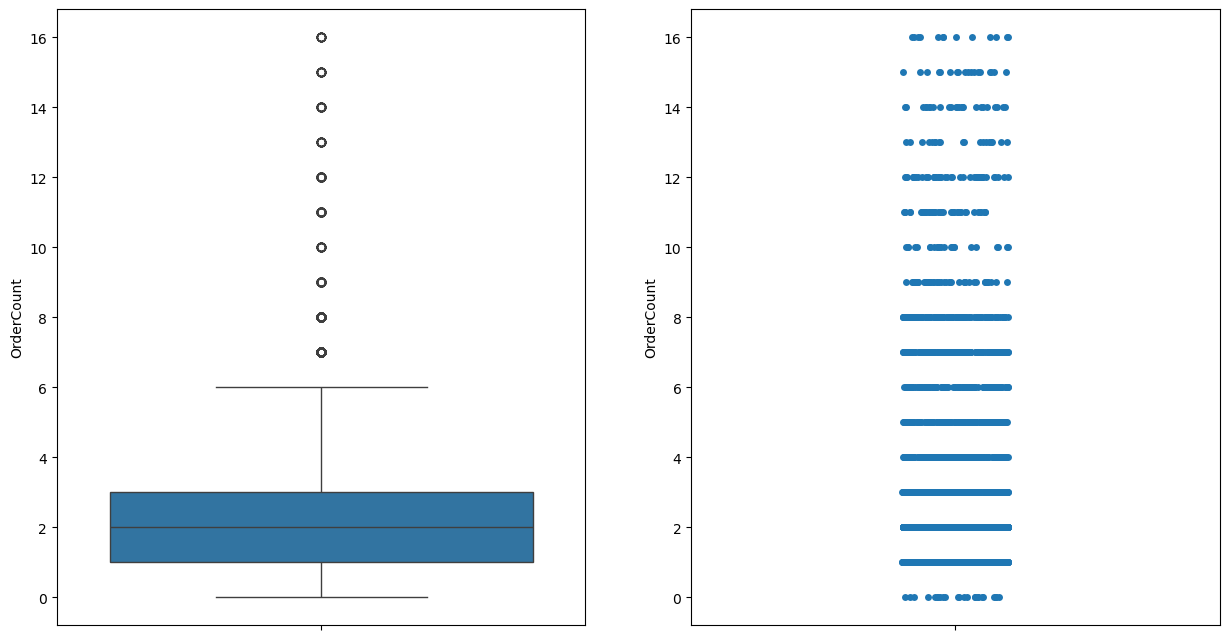

In [95]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['OrderCount'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['OrderCount'], ax=fig.add_subplot(gs[0,1]))
plt.show()

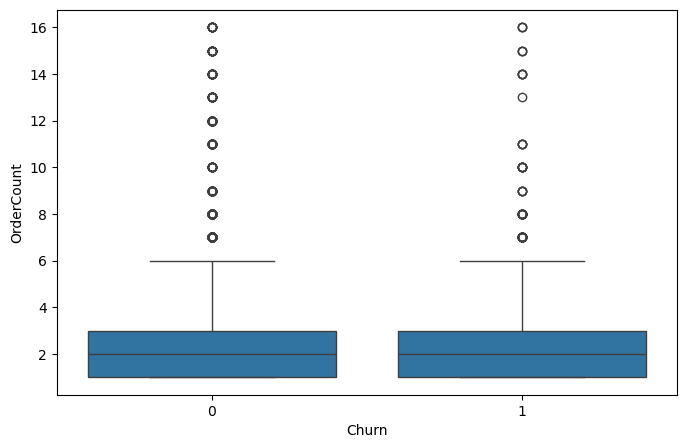

In [96]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['OrderCount'])
plt.show()

In [97]:
train[['Churn', 'OrderCount']].corr()

,Churn,OrderCount
Churn,1.000000,-0.025591
OrderCount,-0.025591,1.000000


### DaySinceLastOrder

dias desde a última compra

Variável numérica discreta

In [98]:
x_train['DaySinceLastOrder'].isnull().sum(), x_test['DaySinceLastOrder'].isnull().sum()

(206, 101)

In [99]:
# verifica se há usuários que não possuem dia da última compra (ou seja nunca compraram) e possuem pedidos. 
# Em tese não faria sentido um usuário ter pedido mas seu ultimo pedido não ser registrado
x_train[x_train['DaySinceLastOrder'].isnull()==True]['OrderCount']

662      1.0
3609     6.0
5455    14.0
5030     2.0
4084     2.0
        ... 
4940     2.0
3677     4.0
2293     1.0
2868    16.0
2857     8.0
Name: OrderCount, Length: 206, dtype: float64

In [100]:
x_train['DaySinceLastOrder'].median()

3.0

In [101]:
# sunbstituindo valores nulos pela mediana. 
x_train['DaySinceLastOrder'] = x_train['DaySinceLastOrder'].fillna(x_train['DaySinceLastOrder'].median())
x_test['DaySinceLastOrder'] = x_test['DaySinceLastOrder'].fillna(x_test['DaySinceLastOrder'].median())

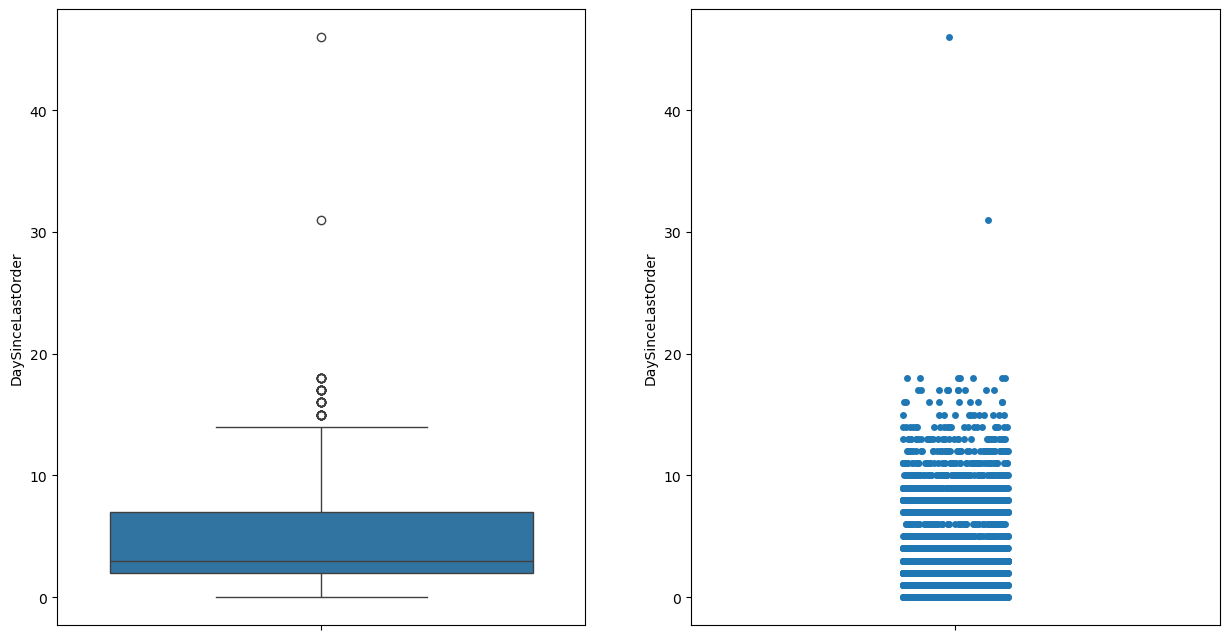

In [102]:
## Validar usuários

fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['DaySinceLastOrder'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['DaySinceLastOrder'], ax=fig.add_subplot(gs[0,1]))
plt.show()

In [103]:
x_train[x_train['DaySinceLastOrder'] >=30][['DaySinceLastOrder', 'OrderCount', 'CouponUsed', 'CashbackAmount']]

,DaySinceLastOrder,OrderCount,CouponUsed,CashbackAmount
2040,46.0,11.0,5.0,206.09
4305,31.0,3.0,1.0,157.04


In [104]:
x_test[x_test['DaySinceLastOrder'] >=30][['DaySinceLastOrder', 'OrderCount', 'CouponUsed', 'CashbackAmount']]

,DaySinceLastOrder,OrderCount,CouponUsed,CashbackAmount
1490,30.0,2.0,0.0,132.04


In [105]:
x_train['DaySinceLastOrder'] = np.where(x_train['DaySinceLastOrder'] > 30, 30, x_train['DaySinceLastOrder'])
x_test['DaySinceLastOrder'] = np.where(x_test['DaySinceLastOrder'] > 30, 30, x_test['DaySinceLastOrder'])

### CashbackAmount

Quantidade de cashback recebido no último mês

In [106]:
x_train['CashbackAmount'].isnull().sum(), x_test['CashbackAmount'].isnull().sum()

(0, 0)

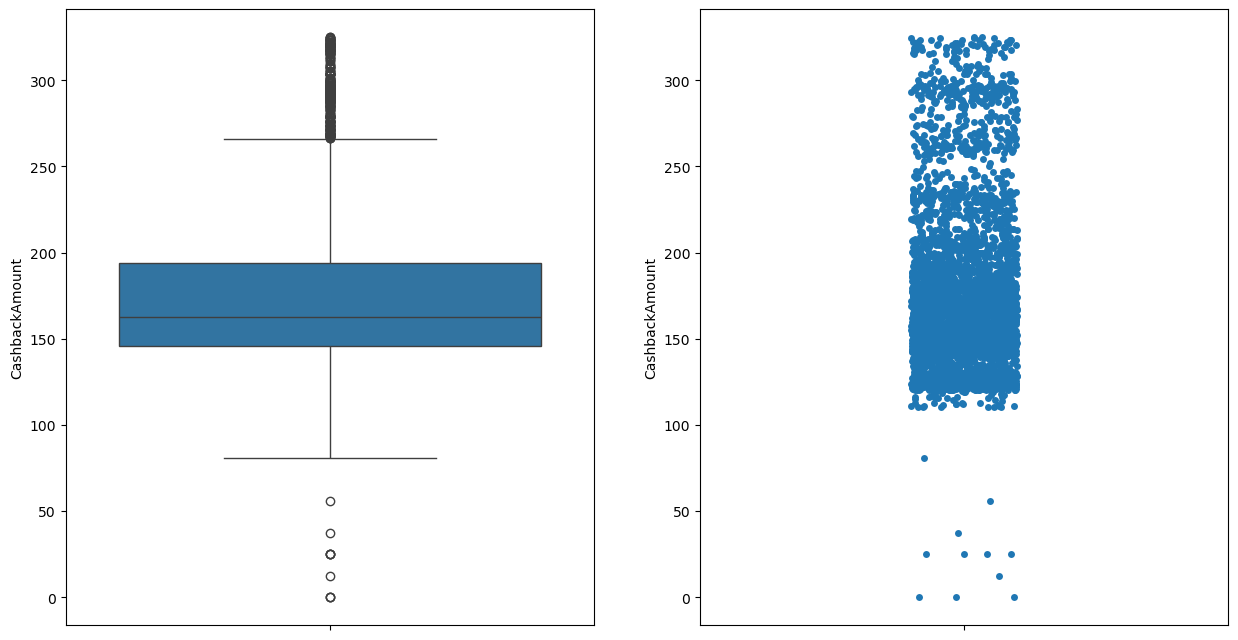

In [107]:
fig = plt.figure(figsize=(15,8))
gs = GridSpec(1,2)
sns.boxplot(x_train['CashbackAmount'], ax=fig.add_subplot(gs[0,0]))
sns.stripplot(x_train['CashbackAmount'], ax=fig.add_subplot(gs[0,1]))
plt.show()

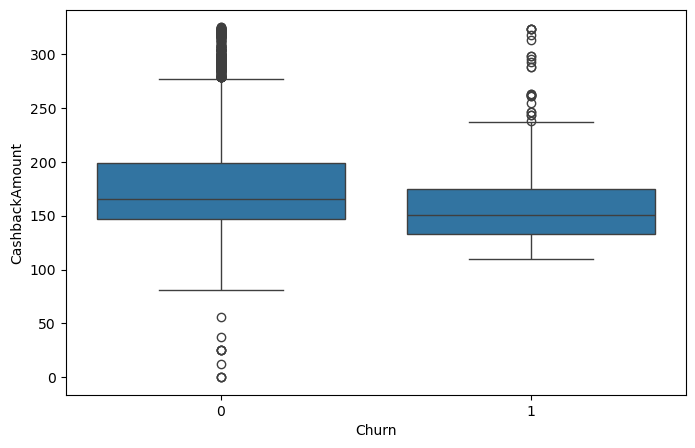

In [108]:
plt.figure(figsize=(8,5))
sns.boxplot(x=train['Churn'], y=train['CashbackAmount'])
plt.show()

In [109]:
# verificar os usuários que não tem nenhum pedido mas em cashback maior que 0
x_train[x_train['OrderCount'] ==0][['OrderCount', 'CouponUsed', 'CashbackAmount']]

,OrderCount,CouponUsed,CashbackAmount
1069,0.0,0.0,259.72
409,0.0,0.0,248.14
869,0.0,0.0,232.47
1440,0.0,0.0,235.49
2421,0.0,0.0,260.32
150,0.0,0.0,236.03
596,0.0,0.0,239.73
2511,0.0,0.0,252.02
143,0.0,0.0,234.96
1363,0.0,0.0,254.27


In [110]:
## substituir esses valores por 0

x_train['CashbackAmount'] = np.where((x_train['OrderCount'] == 0) & (x_train['CashbackAmount'] > 0), 2, x_train['CashbackAmount'])
x_test['CashbackAmount'] = np.where((x_test['OrderCount'] == 0) & (x_test['CashbackAmount'] > 0), 2, x_test['CashbackAmount'])

### Correlação entre as variáveis

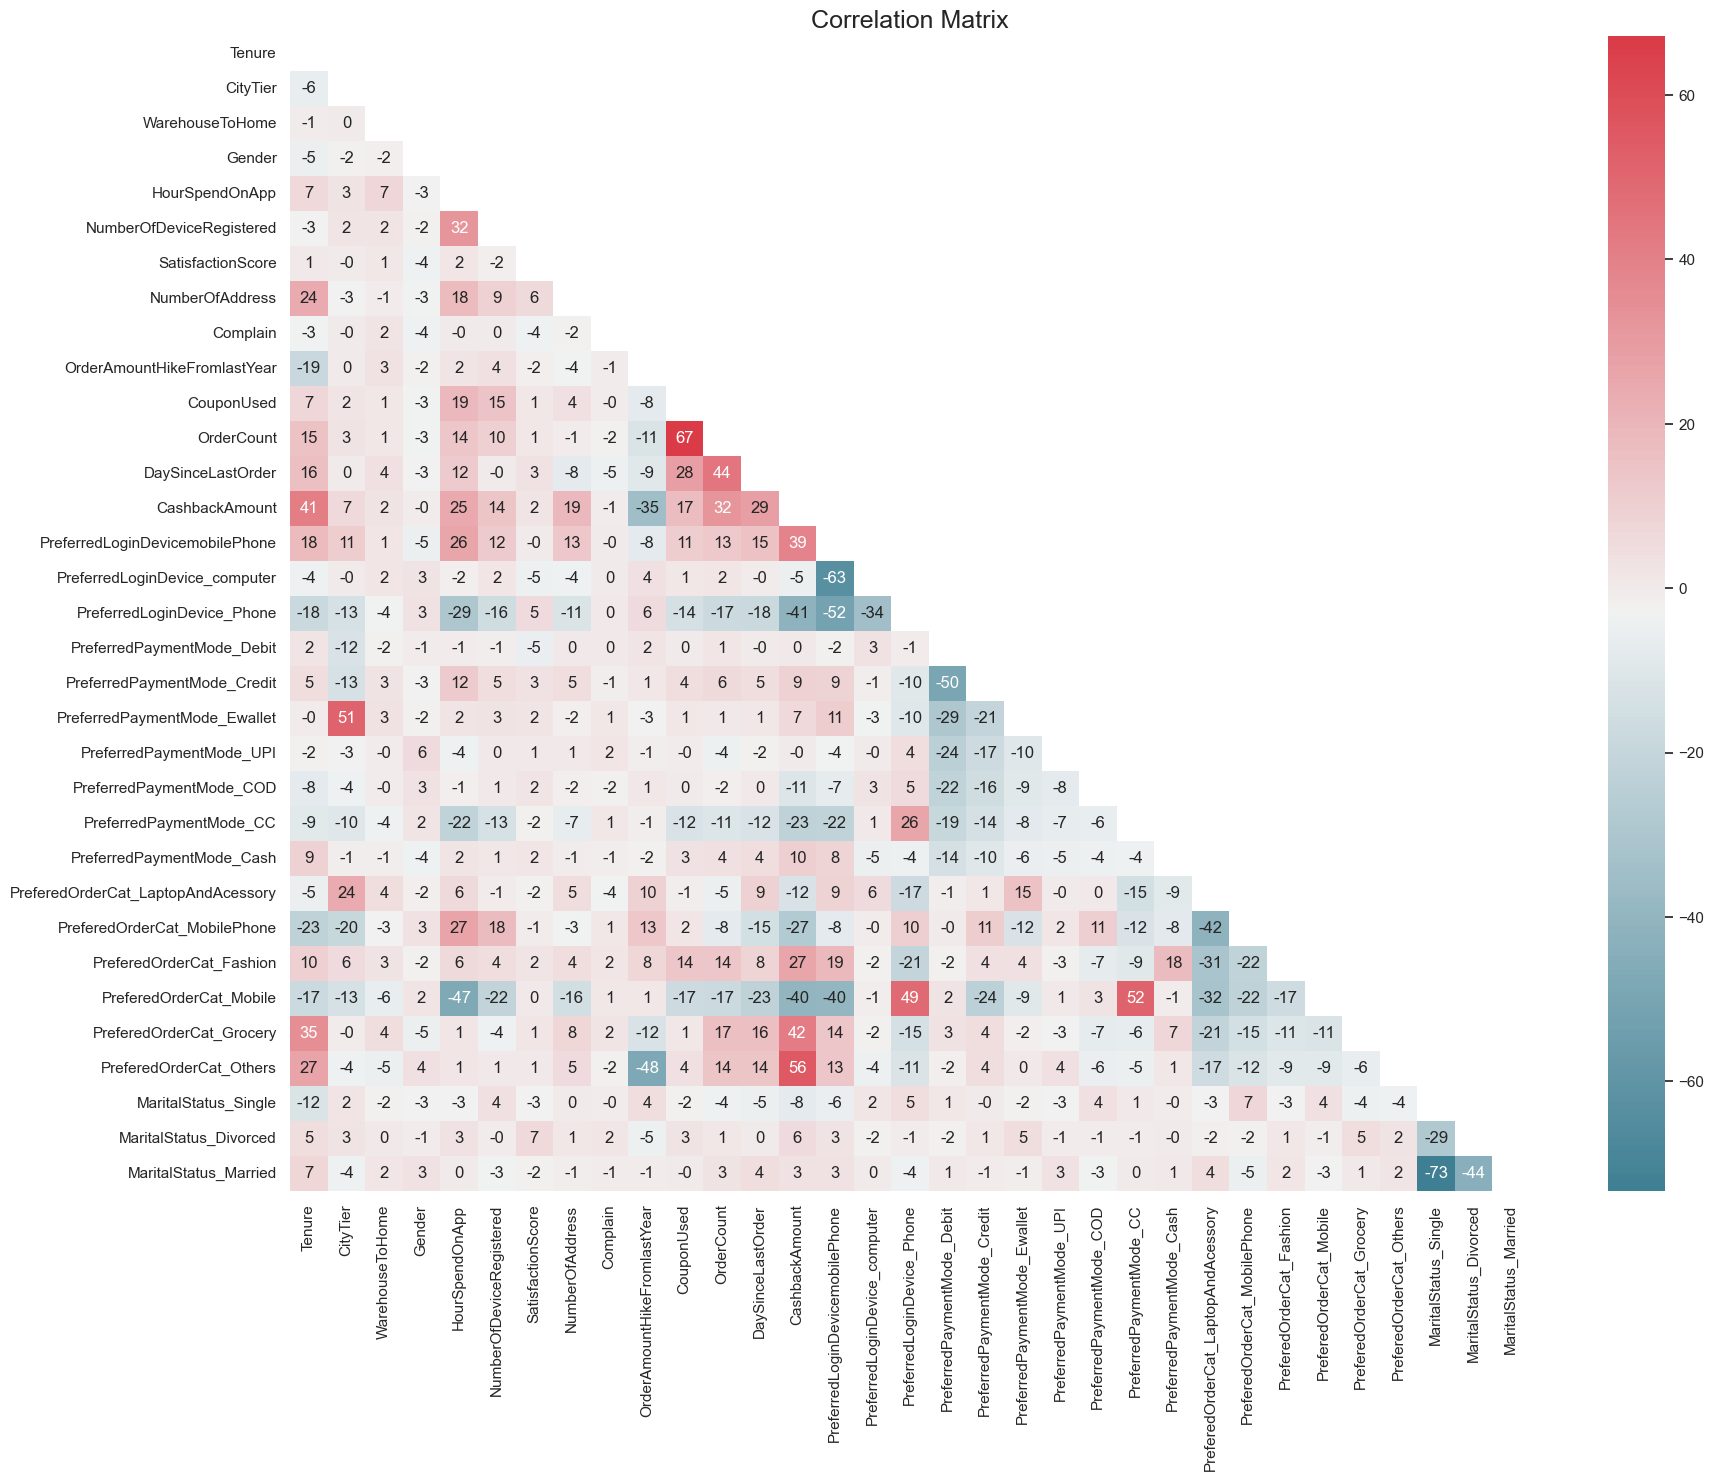

In [111]:
sns.set(style="white")

corr = 100*x_train.corr()

mask = np.triu(np.ones_like(corr, dtype=np.bool_))

f, ax = plt.subplots(figsize=(20, 15))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

plt.title('Correlation Matrix', fontsize=18)

sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt=".0f")

plt.show()

## Salvar dados processados

In [113]:
import pickle

with open('../data/processed/train_test_data.pkl', 'wb') as f:
    pickle.dump((x_train, x_test, y_train, y_test), f)